## Kaggle House Prices
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Steps
1. Do fastai imports
2. Read the data file into data frame
3. ~~Look for dates and expand it~~
4. Change house price into log of house price since that is how the model is evaluated (rmse of the log of the price)
5. Convert strings into categories
6. Replace categories with codes, handle missing continuous variables and split out dependent variable.
7. Split training and validation set.
8. How do we know how good we are doing? Print function to display r^2 and RMSE of the model.
9. Attempt random forest with all defaults

### Step 1

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.model_selection import train_test_split

### Step 2

In [3]:
PATH = "data/"
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False)

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

#df_raw.sort_values(by=['YrSold'], inplace=True)
display_all(df_raw.tail().transpose())        

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


### Step 4 - Change house price into log of house price (Skipped Step 3 there are no dates)

In [4]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Step 5 - Convert strings into categories

In [65]:
?train_cats

In [5]:
train_cats(df_raw)

### Step 6
* Replace categories with codes
* Handle missing continuous variables
* Split out dependent variable.

In [6]:
df, y, nas = proc_df(df_raw, 'SalePrice')

### Step 7 - Split training and validation set.

In [7]:
X_train, X_valid, y_train, y_valid = (train_test_split(df, y, test_size=0.2, random_state=42))
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape 

((1168, 83), (1168,), (292, 83), (292,))

### Step 8 - Print function to display RMSE and score (r^2) of the model.

In [8]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    data = {
            'RMSE_train': [rmse(m.predict(X_train), y_train)],
            'RMSE_valid': [rmse(m.predict(X_valid), y_valid)],
            'score_train': [m.score(X_train, y_train)],
            'score_valid': [m.score(X_valid, y_valid)]
            }
    if hasattr(m, 'oob_score_'): data['score_oob_'] = [m.oob_score_]
    df_score = pd.DataFrame(data)
    display_all(df_score.transpose())

### Step 9 - Random forest with all defaults

In [9]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 209 ms, sys: 4.91 ms, total: 214 ms
Wall time: 116 ms


,0
RMSE_train,0.070529
RMSE_valid,0.158008
score_train,0.967369
score_valid,0.866213


Plot r^2 against number of estimators (number of trees) will give you an idea if adding more trees will make a difference

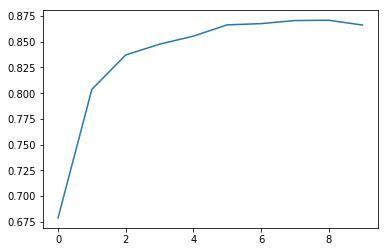

In [10]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

### Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

### Tweaking parameters

I just played around with these parameters to see if I could get *RMSE_valid* to go down.

* `min_samples_leaf` - minimum number of rows in the leaf node
* `max_features` - max columns/feature to randomly select from at each split
* `n_estimators` - how many trees to build

In [11]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=1, max_features=0.5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

,0
RMSE_train,0.056540
RMSE_valid,0.149677
score_train,0.979030
score_valid,0.879949
score_oob_,0.857650


In [76]:
??np.mean

### Run against test set and produce submission file

In [12]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=1, max_features=0.5, oob_score=True)
# train with full training set
m.fit(df, y)

# Prepare the test set
df_test_raw = pd.read_csv(f'{PATH}test.csv', low_memory=False)
train_cats(df_test_raw)
# use the na columns from the training set on the test set too (including the medians from the training set)
df_test, _, _ = proc_df(df_test_raw, na_dict=nas)
# Test set contains more columns with missing values than the training set, so I just drop those.
#mismatched_cols = list(set(df_test.columns.values) - set(df.columns.values))
#df_test.drop(columns=mismatched_cols, inplace=True)

# Predict the log of SalePrice
test_preds = m.predict(df_test)

# Prepare the submission file - use np.exp on SalePrice to reverse the log
pd.DataFrame(
    {'Id': df_test['Id'], 'SalePrice': np.exp(test_preds)}
).to_csv(f'{PATH}sub.csv', index=False)


# Part 2  - Prediction Confidence & Important Features

In [13]:
# Slow way using list comprehension, calculates predictions in serial
#%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
#np.mean(preds[:,0]), np.std(preds[:,0])

def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])



CPU times: user 29 ms, sys: 34.5 ms, total: 63.5 ms
Wall time: 86.9 ms


(11.911022312264146, 0.07031176326113686)

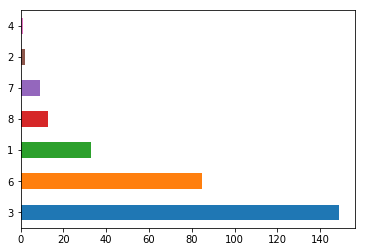

In [14]:
_, raw_valid = train_test_split(df_raw, test_size=0.2, random_state=42)

x = raw_valid.copy()
#preds rows are predictions for each estimator, columns are the predictions for each row for that estimator.

# Add the mean prediction for all estimators to the record & std dev
x['pred'] = np.mean(preds, axis=0)
x['pred_std'] = np.std(preds, axis=0)
train_cats(x)
x, _, _ = proc_df(x)
#histogram of house styles
x.HouseStyle.value_counts().plot.barh();


In [15]:
def plot_confidence_by_feature(feature, df1):
    """
    group records by feature then plot the deviation between actual SalePrice and predicted Sale Price
    for the given feature. This will give you an idea of how confident we are predicting around this feature.
    """
    flds = [feature, 'SalePrice', 'pred', 'pred_std']
    summary = df1[flds].groupby(feature,
                                as_index=False).mean()
    #remove nulls
    summary = summary[~pd.isnull(summary.SalePrice)]
    summary
    summary.plot(feature, 'SalePrice', 'barh')
    summary.plot(feature, 'pred', 'barh', xerr='pred_std');
    #print((summary.pred_std/summary.pred).sort_values(ascending=False))
    
#group records by house style and view the deviation on House Style to see how confident we are when predicting
# around this feature.
# flds = ['HouseStyle', 'SalePrice', 'pred', 'pred_std']
# house_style_summ = x[flds].groupby('HouseStyle', as_index=False).mean()

# #remove nulls
# house_style_summ = house_style_summ[~pd.isnull(house_style_summ.SalePrice)]
# house_style_summ
# house_style_summ.plot('HouseStyle', 'SalePrice', 'barh', xlim=(0,15))
# house_style_summ.plot('HouseStyle', 'pred', 'barh', xerr='pred_std', xlim=(0,15));
# x.plot('HouseStyle', 'pred_std', figsize=(10,6), legend=True);
# print(x['HouseStyle'])
#plot_confidence_by_feature('Foundation', x)
#plot_confidence_by_feature('HouseStyle', x)
#plot_confidence_by_feature('OverallQual', x)




In [161]:
??x.plot

### Feature importance

In [16]:
fi = rf_feat_importance(m, df); fi[:30]

,cols,imp
17,OverallQual,0.333295
46,GrLivArea,0.150510
19,YearBuilt,0.094279
61,GarageCars,0.060931
38,TotalBsmtSF,0.044193
62,GarageArea,0.030942
49,FullBath,0.023895
43,1stFlrSF,0.023806
34,BsmtFinSF1,0.017539
41,CentralAir,0.015670


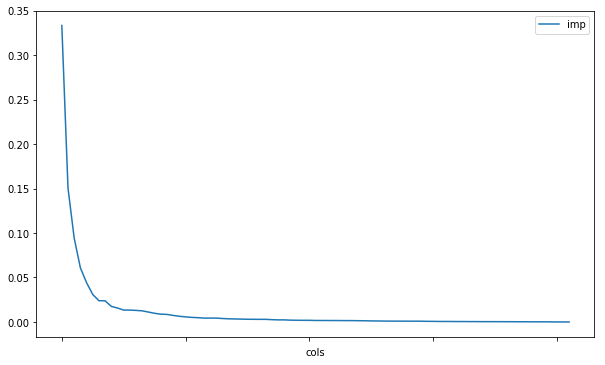

In [17]:
fi.plot('cols', 'imp', figsize=(10,6), legend=True);

In [18]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

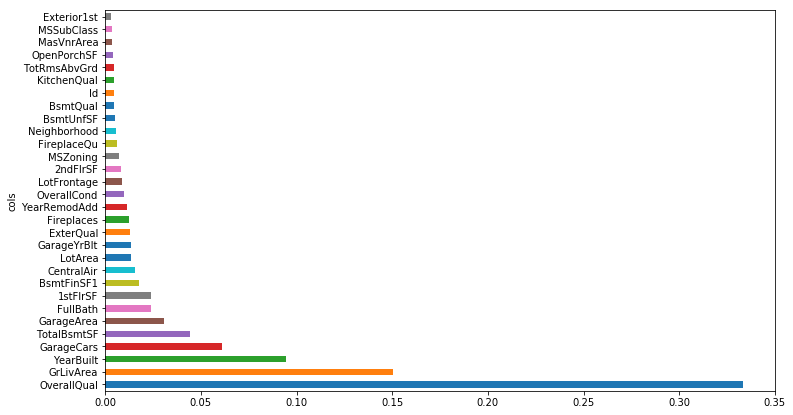

In [19]:
plot_fi(fi[:30]);

In [20]:
to_keep = fi[fi.imp>0.0042].cols; len(to_keep)
df_keep = df[to_keep].copy()
print(df_keep.columns.values)
X_train, X_valid = (train_test_split(df_keep, test_size=0.2, random_state=42))


['OverallQual' 'GrLivArea' 'YearBuilt' 'GarageCars' 'TotalBsmtSF' 'GarageArea' 'FullBath' '1stFlrSF'
 'BsmtFinSF1' 'CentralAir' 'LotArea' 'GarageYrBlt' 'ExterQual' 'Fireplaces' 'YearRemodAdd' 'OverallCond'
 'LotFrontage' '2ndFlrSF' 'MSZoning' 'FireplaceQu' 'Neighborhood' 'BsmtUnfSF' 'BsmtQual' 'Id' 'KitchenQual'
 'TotRmsAbvGrd']


,0
RMSE_train,0.055446
RMSE_valid,0.145207
score_train,0.979833
score_valid,0.887012
score_oob_,0.861629


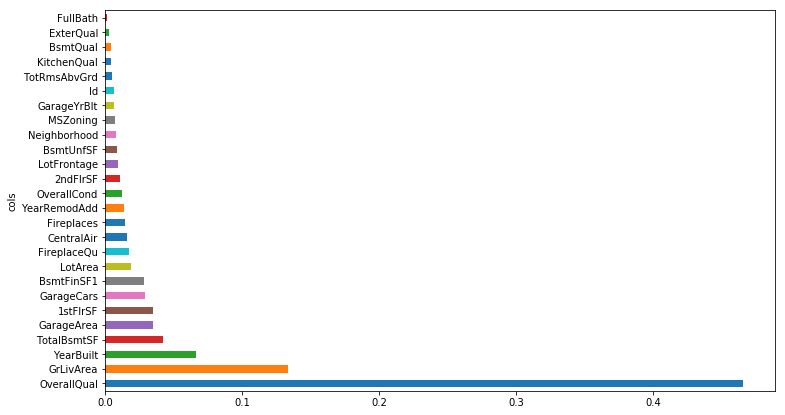

In [21]:
#only train on the important features and see what happens

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features=0.7,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

fi = rf_feat_importance(m, df_keep); fi[:30]
plot_fi(fi[:30]);

### Try another submission with only important featues

In [22]:
m =  RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features=0.7,
                          n_jobs=-1, oob_score=True)
# train with full training set
m.fit(df[to_keep].copy(), y)

# Prepare the test set
df_test_raw = pd.read_csv(f'{PATH}test.csv', low_memory=False)
train_cats(df_test_raw)
df_test, _, _ = proc_df(df_test_raw, na_dict=nas)

test_preds = m.predict(df_test[to_keep].copy())

# Prepare the submission file - use np.exp on SalePrice to reverse the log
pd.DataFrame(
    {'Id': df_test['Id'], 'SalePrice': np.exp(test_preds)}
).to_csv(f'{PATH}sub2.csv', index=False)
